# World Populations over the Last 60 Years
>  The last data from the World Bank is the would population from 1960 to 2016

---

In [1]:
#pip install datapackage
#pip install plotly_express


In [2]:
# Some world data are summarized data
# - we are looking for single country population data

In [3]:
# Import pandas 
import pandas as pd 
import datapackage
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px

# interact:  Draw a bar by top numbers
from ipywidgets import interact


In [4]:
# load world bank Data Package into storage 
data_url = 'https://datahub.io/JohnSnowLabs/population-figures-by-country/datapackage.json'
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        df = pd.read_csv(resource.descriptor['path'])
df.set_index("Country_Code", inplace = True) 


# df.head()
# print(df.shape)

# the most recent year: 2016
df16= df.iloc[:, -1]
# df16.sort_values().tail(20)

In [5]:
# Find the country code and merge them
url = "https://gist.githubusercontent.com/tadast/8827699/raw/3cd639fa34eec5067080a61c69e3ae25e3076abb/countries_codes_and_coordinates.csv"
df_code3 = pd.read_csv(url)
code3 = df_code3["Alpha-3 code"][0]

# for i, c in enumerate(code3):
#     print(i,c)
# # the length is not 3, and the longtitude/latitude have the same problem. 

# reset to 
df_code3["Code3"] = df_code3["Alpha-3 code"].map(lambda x: x.strip()[1:-1] )
df_code3["Lat"] = df_code3["Latitude (average)"].map(lambda x: x.strip()[1:-1]) 
df_code3["Long"] = df_code3["Longitude (average)"].map(lambda x: x.strip()[1:-1]) 

# set index 
df_code3.set_index("Code3", inplace=True )

# keep only the long and lat cols.
df_code3=df_code3.iloc[:, [-2, -1]]
# df_code3.shape # 256 rows


In [6]:
# there are no missing value, but some duplicated: 24 rows
df_code3.isna().sum() # none

# du=df_code3[df_code3.duplicated()] # 24 : 12 are extra
# print(du.size)

#remove
df_code3 = df_code3.drop_duplicates()
# df_code3

# use left-join-right
df_m= df_code3.join(df) 
# df_m

In [7]:
# Data Cleaning

# (1) some country's names  are  missing: 32 countries
df_m.Country.isna().sum()

# # keep only the country which has name in it 
df_good = df_m[df_m.Country.notna()]


# (2) drop duplicated: non
df_good = df_good.drop_duplicates() 


# (3) 4 row with missing data
df_good[df_good.isnull().any(axis=1)].shape

df_clean = df_good.replace(to_replace = np.nan, value =0) 
# df_clean.shape

# double check
# df_clean[df_clean.isnull().any(axis=1)].shape
# df_clean[df_clean.duplicated()].sum().sum()
# df_clean.head()

# The Latest Data of Global Population in Year 2016

In [28]:
import folium
world_map = folium.Map(location=[11,0],   
                       width='95%',
                       height='95%',
                       left='5%',
                       top='5%',
                       zoom_start=1, max_zoom = 10, min_zoom = 2)

for i in range(0,len(df_clean)):
    folium.Circle(
        location=[df_clean.iloc[i]['Lat'], df_clean.iloc[i]['Long']],
        fill=True,
        radius=( df_clean.iloc[i,-1]/1000),
        color='blue',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+ df_clean.Country[i] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>2016 Population: "+str(int(df_clean.iloc[i,-1]) )+"</li>"+
                    "</ul></div>",
        fill_color='indigo',
        ).add_to(world_map)

world_map

# Over last 50 years, the global population has doubled 

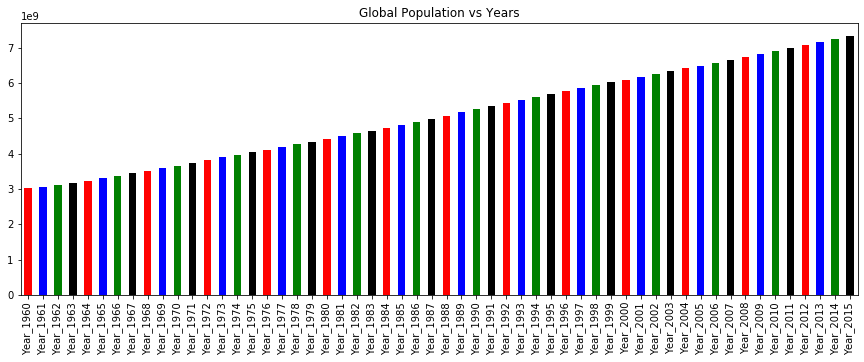

In [9]:
# Global population changes over time
# find the total of each year
Total_all_year = df_clean.iloc[:, 3:-1].sum()

Total_all_year.plot(kind = "bar", color=['r', 'b', 'g','k'],figsize=(15, 5), title = "Global Population vs Years")
plt.show()

# For each country, the increase is quite different

In [10]:
# Population Changes Country by Country
# interact:  Draw a year-year for each country
def f_bar(Country):
    print(Country)
    country_population = df_clean[df_clean.Country == Country].T.iloc[3:]
    country_population.plot(kind = "bar", color=['r', 'b', 'g','k'], figsize = [15 ,5],grid=True)
    plt.title(" Population change of each country ")
    plt.show()
# 
#     df_clean.Country
#     print(df_clean.Country)
# #     T.plot( kind= "bar", color=['r', 'b', 'g','k'], figsize=(15,5))
#     

    
# drop box by country    
if __name__ == "__main__": 
    interact(f_bar, Country=df_clean.Country)

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

# The Top 20 Countries in Year 2016

In [11]:
# # Population top 10 in 2016

df_2016 =pd.DataFrame(df_clean.loc[:, ["Country", 'Year_2016'] ])
df_2016.shape

y16_top10 = df_2016.sort_values(by="Year_2016", ascending =False).head(20)

# change to int
y16_top10.Year_2016 = y16_top10.Year_2016.astype('int64')

print(y16_top10)


                  Country   Year_2016
Code3                                
CHN                 China  1378665000
IND                 India  1324171354
USA         United States   323127513
IDN             Indonesia   261115456
BRA                Brazil   207652865
PAK              Pakistan   193203476
NGA               Nigeria   185989640
BGD            Bangladesh   162951560
RUS    Russian Federation   144342396
MEX                Mexico   127540423
JPN                 Japan   126994511
PHL           Philippines   103320222
ETH              Ethiopia   102403196
EGY      Egypt, Arab Rep.    95688681
VNM               Vietnam    92701100
DEU               Germany    82667685
IRN    Iran, Islamic Rep.    80277428
TUR                Turkey    79512426
COD      Congo, Dem. Rep.    78736153
THA              Thailand    68863514


# Check more top population countries by sliding the bar

In [13]:
# In year 2016, top n
def f_bar(Top_n_2016):
    df_top=df_2016.sort_values(by="Year_2016", ascending=True).tail(Top_n_2016)
    df_top.plot.pie(y="Year_2016", figsize=(15,15))
               
    plt.title(" Top n counties in year 2016")
    plt.show()  
    
    
# bar by country    
if __name__ == "__main__": 
    interact(f_bar, Top_n_2016=(1,50))

interactive(children=(IntSlider(value=25, description='Top_n_2016', max=50, min=1), Output()), _dom_classes=('…

In [14]:
# # remove the longitude and latitude
# df_year = df_clean.iloc[:, 3:].T # change the year only as index

# # by line 
# def f_slide(Year):
#     ind = Year-1960
#     df_xy = df_year.iloc[ind, :]
#     df_xy.plot(kind= "bar", figsize=(30,10));
#     plt.title(" Population - year")
    
# # use the country_data: change by year    
# if __name__ == "__main__":
#     interact(f_slide, Year=(1960, 2016) )
# #     interact(f_line, year=(df_year.index))   #n=(1,20)

# Changes over the last 50 years on top 20 population countries

In [30]:
# Take only top countries for animantion: df_clean.head(20)
df_head = df_clean.sort_values("Year_2016", ascending = False).head(20)


# year = 1960
df0= df_head.iloc[:, [2, 3]]
df0["Year"] = 1960
df0.columns = ['Country', 'Pop', "Year"]

# For the following years: start from 1961
for year in df_head.columns[4:]: 
    y = int(year[-4:])
    col= y - 1960 + 3
#     print(year, y, col )
    df1 = df_head.iloc[:, [2, col]]
    df1["Year"] = y
    df1.columns = ['Country', 'Pop', "Year"]
    df0 = df0.append(df1)



C:\Users\suncf\Anaconda3\envs\DA501\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\suncf\Anaconda3\envs\DA501\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
px.scatter(df0, 
           y ="Country", range_y=["CHN","MEX"],
           x ="Pop", range_x=[10000000,1800000000],log_x= True, 
           
           animation_frame="Year", animation_group="Country",
           size="Pop", size_max=45,
           color="Country",   hover_name="Country"
           
           
            )


In [17]:
# X <=> Y exchanged


# px.scatter(df0, x ="Country", y ="Pop", size ="Pop" ,
#             animation_frame=df0.Year, 
# #             animation_group= years, 
# #            range_x=[1960,2016], 
# #            range_x=[10000000,1500000000],
#            log_y = True,
#            size_max=45,
#            color="Country",
#           )

# # px.scatter(px.data.gapminder(), x="country", y="pop", animation_frame="year", animation_group="country",
# #            size="pop", color="country", hover_name="country", 
# #            log_y= True, 
# #            size_max=45, range_x=["Afghanistan","Zimbabwe"], range_y=[1000000,1800000000])



In [18]:
# sigle country animation

# import plotly_express as px
# df_year = df_clean.iloc[:, 3:] # change the year only as index
# years = np.arange(1960, 2017)
# df_year

# country ="CHN"
# pop  = df_year.loc[country, "Year_1960":"Year_2016" ]
# pop.shape
# px.scatter(df_year, x = years , y= pop, size = list(pop) ,
#            animation_frame=years, 
#            animation_group= years, 
#            range_x=[1960,2016], 
#            range_y=[10000000,1500000000],
#            log_y = True,
#            size_max=45,
#            color=df_year.columns
#           )



In [20]:
# from the plotly document: 
# import plotly_express as px

# px.scatter(px.data.gapminder(), x="country", y="pop", animation_frame="year", animation_group="country",
#            size="pop", color="country", hover_name="country", 
#            log_y= True, 
#            size_max=45, range_x=["Afghanistan","Zimbabwe"], range_y=[1000000,1800000000])


# Voila to Heroku.
Thank you!

In [21]:
# if __name__ == '__main__':
#     !voila  Global_population.ipynb --theme=dark --template=material